In [1]:
from brainiak.funcalign.srm import SRM
import numpy as np 

import matplotlib.pyplot as plt 
import hypertools as hyp 

import logging

np.random.seed(0)

%autosave 5 

Autosaving every 5 seconds


In [2]:
def get_ortho_matrix(V): 
    Q, _ = np.linalg.qr(np.random.normal(size=(V,V)))
    return Q

# Q = get_ortho_matrix(V)
# Q.T @ Q
# Q @ Q.T

def transpose_matrix_list(matrix_list): 
    return [m.T for m in matrix_list]


def gen_simulated_data(n_subjects, V, T, noise_level):
    # make subject 1 
    X = np.random.normal(size=(V,T))
    
    # multi-subject data 
    data = [X]
    # create additional subjects based on subject 1 
    for _ in range(n_subjects-1): 
        # rotation 
#         Q = get_ortho_matrix(V)
#         X_new = Q @ X 
        
        # shift by a vector
        shift = np.zeros(shape=(V,T))
        shift[0,:] = 1
        X_new = X + shift
        
        # append 
        noise = np.random.normal(size=(V,T)) * noise_level
        data.append(X_new + noise)
    return data 

In [3]:
"""gen data"""
# constants 
V = 3
T = 4
n_subjects = 2
noise_level = 0.1

data = gen_simulated_data(n_subjects, V, T, noise_level)

print(np.shape(data))

# # demean 
# for i in range(n_subjects): 
#     mu = np.mean(data[i], axis=1, keepdims=True)
# #     print(np.round(mu))
#     data[i] = data[i] - mu

(2, 3, 4)


In [4]:
%matplotlib notebook  

<IPython.core.display.Javascript object>


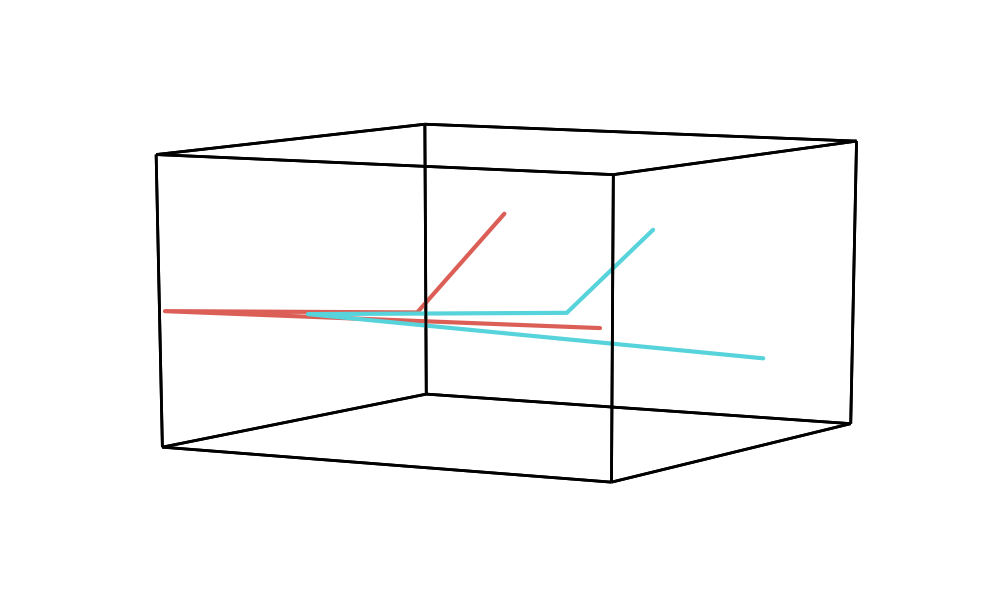

In [5]:
hyp.plot(
    transpose_matrix_list(data), 
#     animate='spin', frame_rate=60, rotations=1,
    size=(5, 3)
)

In [6]:
"""align"""

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

n_components = V

srm = SRM(features=n_components)
srm.fit(data)
data_srm = srm.transform(data)

print(np.shape(data_srm))

INFO:brainiak.funcalign.srm:Starting Probabilistic SRM
INFO:brainiak.funcalign.srm:Iteration 1
INFO:brainiak.funcalign.srm:Objective function -27.700877
INFO:brainiak.funcalign.srm:Iteration 2
INFO:brainiak.funcalign.srm:Objective function -20.958295
INFO:brainiak.funcalign.srm:Iteration 3
INFO:brainiak.funcalign.srm:Objective function -20.693641
INFO:brainiak.funcalign.srm:Iteration 4
INFO:brainiak.funcalign.srm:Objective function -20.540254
INFO:brainiak.funcalign.srm:Iteration 5
INFO:brainiak.funcalign.srm:Objective function -20.436977
INFO:brainiak.funcalign.srm:Iteration 6
INFO:brainiak.funcalign.srm:Objective function -20.362698
INFO:brainiak.funcalign.srm:Iteration 7
INFO:brainiak.funcalign.srm:Objective function -20.306701
INFO:brainiak.funcalign.srm:Iteration 8
INFO:brainiak.funcalign.srm:Objective function -20.262957
INFO:brainiak.funcalign.srm:Iteration 9
INFO:brainiak.funcalign.srm:Objective function -20.227823
INFO:brainiak.funcalign.srm:Iteration 10
INFO:brainiak.funcalig

(2, 3, 4)


<IPython.core.display.Javascript object>


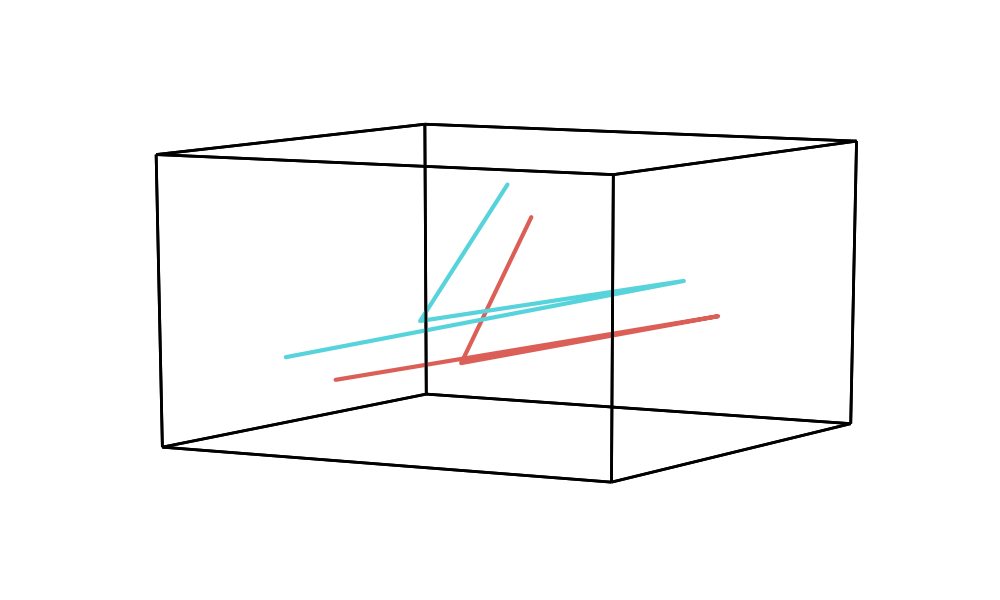

In [7]:
hyp.plot(
    transpose_matrix_list(data_srm), 
#     animate='spin', frame_rate=60, rotations=1,
    size=(5, 3)
)